In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
file_path = '/Users/kanaha/statistics/SSDSE-D-2023.xlsx'
df = pd.read_excel(file_path)
print(df.head())

  SSDSE-D-2023   2021年 Prefecture         MA00           MB00  MB01 MB011  \
0         男女の別   地域コード       都道府県  推定人口（10歳以上）  学習・自己啓発・訓練の総数   外国語    英語   
1         0_総数  R00000         全国       112462           39.6  14.1  12.8   
2         0_総数  R01000        北海道         4614             35  11.1   9.9   
3         0_総数  R02000        青森県         1090           25.4   7.4   6.6   
4         0_総数  R03000        岩手県         1075           28.9   7.7   7.1   

      MB012             MB02        MB021  ... MG20   MG51 MG52 MG53  \
0  英語以外の外国語  商業実務・ビジネス関係(総数)  パソコンなどの情報処理  ...  その他  通勤・通学   仕事   学業   
1       4.2             20.1         16.5  ...   16     79  340  393   
2       3.3               17         14.1  ...   15     64  343  391   
3         2             12.7         10.3  ...   12     61  370  423   
4       2.4             12.8         10.3  ...   17     63  362  472   

       MH01      MH02      MH03      MH04      MH51       MH52  
0        起床      朝食開始      夕食開始        

In [19]:
# file_path2 = '/Users/kanaha/statistics/SSDSE-E-2025.xlsx'
# df = pd.read_excel(file_path2)
# print(df.head())

In [20]:
# Excelファイルを読み込む際に、ヘッダーを2行目（インデックス1）にする
df = pd.read_excel(file_path, header=1)
#２列目を削除する
df = df.drop(df.columns[1], axis=1)

print(df.head())

   男女の別 都道府県  推定人口（10歳以上）  学習・自己啓発・訓練の総数   外国語    英語  英語以外の外国語  \
0  0_総数   全国       112462           39.6  14.1  12.8       4.2   
1  0_総数  北海道         4614           35.0  11.1   9.9       3.3   
2  0_総数  青森県         1090           25.4   7.4   6.6       2.0   
3  0_総数  岩手県         1075           28.9   7.7   7.1       2.4   
4  0_総数  宮城県         2065           37.5  12.4  10.9       4.0   

   商業実務・ビジネス関係(総数)  パソコンなどの情報処理  商業実務・ビジネス関係  ...  その他.4  通勤・通学.1  仕事.1  学業.1  \
0             20.1         16.5          8.5  ...     16       79   340   393   
1             17.0         14.1          6.7  ...     15       64   343   391   
2             12.7         10.3          5.2  ...     12       61   370   423   
3             12.8         10.3          5.4  ...     17       63   362   472   
4             18.9         16.0          7.4  ...     16       73   352   395   

         起床      朝食開始      夕食開始        就寝        出勤  仕事からの帰宅時間  
0  06:38:00  07:11:00  18:58:00  23:04:00  08:20:00

In [21]:
# # Excelファイルを読み込む際に、ヘッダーを2行目（インデックス1）にする
# df = pd.read_excel(file_path2, header=1)
# #２列目を削除する
# df = df.drop(df.columns[1], axis=1)

# print(df.head())

In [22]:
plt.rcParams['font.family'] = 'Hiragino Sans GB' # Macの場合の例
plt.rcParams['axes.unicode_minus'] = False # マイナス記号を正しく表示するため

--- 岩手県の男女別時間配分データ ---
          男性   女性
活動カテゴリ           
睡眠       484  476
食事        99  101
仕事       260  179
家事        29  137
育児         5   14
介護・看護      2    3
通勤・通学     29   20
休養・くつろぎ  122  119
趣味・娯楽     49   32


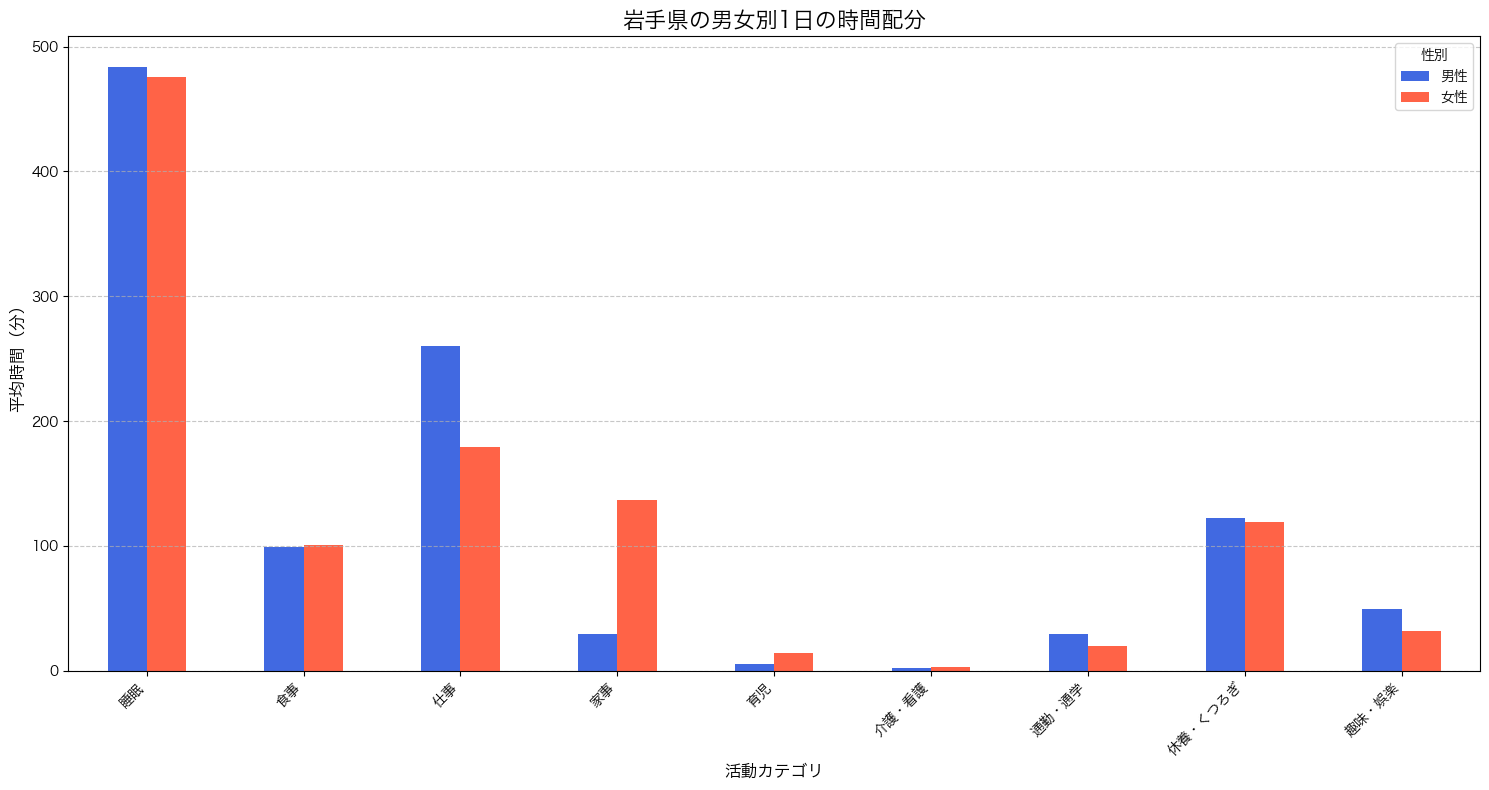


--- グラフからの考察 ---
上記の棒グラフは、岩手県における男性と女性の平均的な1日の時間配分を比較したものです。
1. **仕事時間と家事時間**: 男性は仕事に費やす時間が女性よりも大幅に長い一方、女性は家事に費やす時間が男性を大きく上回っています。これは、これまでの全国的な分析結果と同様、岩手県でも明確な性別役割分担が存在していることを示しています。
2. **睡眠・食事・休養**: 睡眠や食事といった生理的な時間や、休養・くつろぎの時間には男女間で大きな差は見られません。
3. **育児・介護**: 育児や介護・看護の時間は女性の方が男性よりも長いことがわかります。これもまた、女性が家庭内の無償労働の大部分を担っているという現状を裏付けています。
このグラフは、岩手県における男女の時間配分の実態を視覚的に捉え、仕事と家事における男女格差を具体的に示す上で非常に有効なツールです。


In [23]:
# --- 岩手県の男女別データを抽出 ---
# '都道府県'が'岩手県'で、'男女の別'が'1_男'または'2_女'の行を抽出
iwate_gender_data = df[(df['都道府県'] == '岩手県') & (df['男女の別'].isin(['1_男', '2_女']))].copy()

# 可視化したい時間カテゴリの列名を定義
time_columns = ['睡眠', '食事', '仕事', '家事', '育児', '介護・看護', '通勤・通学', '休養・くつろぎ', '趣味・娯楽']

# 男女別のデータを抽出してDataFrameに整理
male_data = iwate_gender_data[iwate_gender_data['男女の別'] == '1_男'][time_columns].iloc[0]
female_data = iwate_gender_data[iwate_gender_data['男女の別'] == '2_女'][time_columns].iloc[0]

# グラフ化用のDataFrameを作成
df_gender_comparison = pd.DataFrame({
    '男性': pd.to_numeric(male_data, errors='coerce'),
    '女性': pd.to_numeric(female_data, errors='coerce')
})

# インデックス（活動カテゴリ）を日本語に
df_gender_comparison.index.name = '活動カテゴリ'

print("--- 岩手県の男女別時間配分データ ---")
print(df_gender_comparison)

# --- 男女で比較した棒グラフで可視化 ---
df_gender_comparison.plot(kind='bar', figsize=(15, 8), color={'男性': 'royalblue', '女性': 'tomato'})
plt.title('岩手県の男女別1日の時間配分', fontsize=16)
plt.xlabel('活動カテゴリ', fontsize=12)
plt.ylabel('平均時間（分）', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='性別')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- 考察 ---
print("\n--- グラフからの考察 ---")
print("上記の棒グラフは、岩手県における男性と女性の平均的な1日の時間配分を比較したものです。")
print("1. **仕事時間と家事時間**: 男性は仕事に費やす時間が女性よりも大幅に長い一方、女性は家事に費やす時間が男性を大きく上回っています。これは、これまでの全国的な分析結果と同様、岩手県でも明確な性別役割分担が存在していることを示しています。")
print("2. **睡眠・食事・休養**: 睡眠や食事といった生理的な時間や、休養・くつろぎの時間には男女間で大きな差は見られません。")
print("3. **育児・介護**: 育児や介護・看護の時間は女性の方が男性よりも長いことがわかります。これもまた、女性が家庭内の無償労働の大部分を担っているという現状を裏付けています。")
print("このグラフは、岩手県における男女の時間配分の実態を視覚的に捉え、仕事と家事における男女格差を具体的に示す上で非常に有効なツールです。")

--- 岩手県の男女別時間配分データ ---
                     男性     女性
活動カテゴリ                        
睡眠                484.0  476.0
身の回りの用事            74.0   90.0
食事                 99.0  101.0
通勤・通学              29.0   20.0
パソコンなどの情報処理        12.3    8.3
仕事                260.0  179.0
学業                 39.0   41.0
家事                 29.0  137.0
介護・看護               2.0    3.0
育児                  5.0   14.0
買い物                19.0   30.0
移動(通勤・通学を除く)       23.0   20.0
テレビ・ラジオ・新聞・雑誌     149.0  127.0
休養・くつろぎ           122.0  119.0
学習・自己啓発・訓練(学業以外)    9.0    8.0
趣味・娯楽              49.0   32.0
スポーツ               15.0    8.0
ボランティア活動・社会参加活動     3.0    2.0
交際・付き合い             6.0    9.0
受診・療養               5.0    7.0
その他                 6.2    5.7


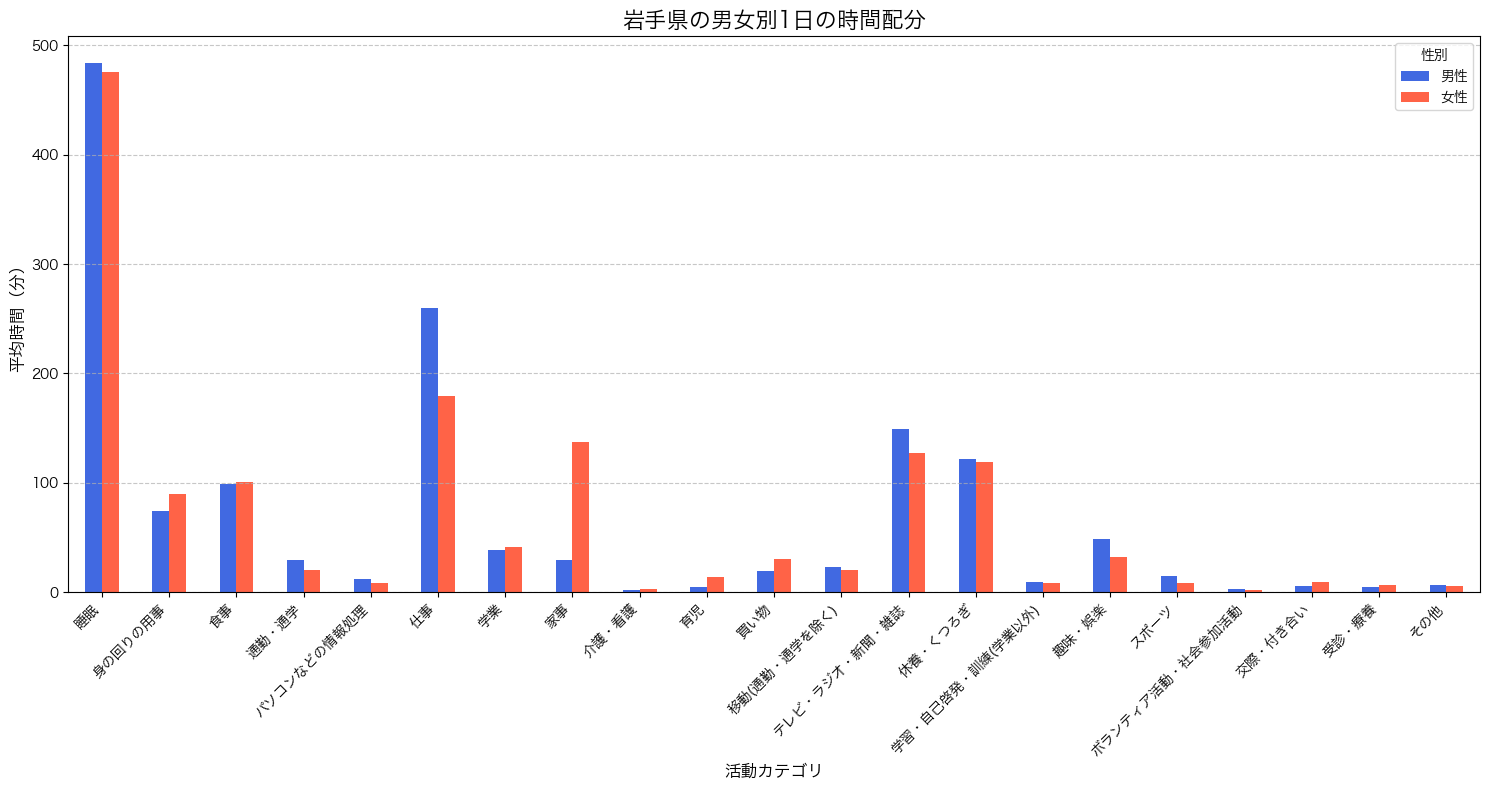


--- グラフからの考察 ---
上記の棒グラフは、岩手県における男性と女性の平均的な1日の時間配分を比較したものです。
1. **仕事時間と家事時間**: 男性は仕事に費やす時間が女性よりも大幅に長い一方、女性は家事に費やす時間が男性を大きく上回っています。これは、これまでの全国的な分析結果と同様、岩手県でも明確な性別役割分担が存在していることを示しています。
2. **睡眠・食事・休養**: 睡眠や食事といった生理的な時間や、休養・くつろぎの時間には男女間で大きな差は見られません。
3. **育児・介護**: 育児や介護・看護の時間は女性の方が男性よりも長いことがわかります。これもまた、女性が家庭内の無償労働の大部分を担っているという現状を裏付けています。
このグラフは、岩手県における男女の時間配分の実態を視覚的に捉え、仕事と家事における男女格差を具体的に示す上で非常に有効なツールです。


In [24]:
# --- 岩手県の男女別データを抽出 ---
# '都道府県'が'岩手県'で、'男女の別'が'1_男'または'2_女'の行を抽出
iwate_gender_data = df[(df['都道府県'] == '岩手県') & (df['男女の別'].isin(['1_男', '2_女']))].copy()


# 可視化したい時間カテゴリの列名を定義
time_columns = [
    '睡眠',
    '身の回りの用事',
    '食事',
    '通勤・通学',
    'パソコンなどの情報処理',
    '仕事', 
    '学業', 
    '家事',
    '介護・看護',
    '育児',
    '買い物',
    '移動(通勤・通学を除く)',
    'テレビ・ラジオ・新聞・雑誌',
    '休養・くつろぎ',
    '学習・自己啓発・訓練(学業以外)',
    '趣味・娯楽',
    'スポーツ',
    'ボランティア活動・社会参加活動',
    '交際・付き合い',
    '受診・療養',
    'その他'
    ]

# 男女別のデータを抽出してDataFrameに整理
male_data = iwate_gender_data[iwate_gender_data['男女の別'] == '1_男'][time_columns].iloc[0]
female_data = iwate_gender_data[iwate_gender_data['男女の別'] == '2_女'][time_columns].iloc[0]

# グラフ化用のDataFrameを作成
df_gender_comparison = pd.DataFrame({
    '男性': pd.to_numeric(male_data, errors='coerce'),
    '女性': pd.to_numeric(female_data, errors='coerce')
})

# インデックス（活動カテゴリ）を日本語に
df_gender_comparison.index.name = '活動カテゴリ'

print("--- 岩手県の男女別時間配分データ ---")
print(df_gender_comparison)

# --- 男女で比較した棒グラフで可視化 ---
df_gender_comparison.plot(kind='bar', figsize=(15, 8), color={'男性': 'royalblue', '女性': 'tomato'})
plt.title('岩手県の男女別1日の時間配分', fontsize=16)
plt.xlabel('活動カテゴリ', fontsize=12)
plt.ylabel('平均時間（分）', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='性別')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- 考察 ---
print("\n--- グラフからの考察 ---")
print("上記の棒グラフは、岩手県における男性と女性の平均的な1日の時間配分を比較したものです。")
print("1. **仕事時間と家事時間**: 男性は仕事に費やす時間が女性よりも大幅に長い一方、女性は家事に費やす時間が男性を大きく上回っています。これは、これまでの全国的な分析結果と同様、岩手県でも明確な性別役割分担が存在していることを示しています。")
print("2. **睡眠・食事・休養**: 睡眠や食事といった生理的な時間や、休養・くつろぎの時間には男女間で大きな差は見られません。")
print("3. **育児・介護**: 育児や介護・看護の時間は女性の方が男性よりも長いことがわかります。これもまた、女性が家庭内の無償労働の大部分を担っているという現状を裏付けています。")
print("このグラフは、岩手県における男女の時間配分の実態を視覚的に捉え、仕事と家事における男女格差を具体的に示す上で非常に有効なツールです。")

(0.0, 63225.6)

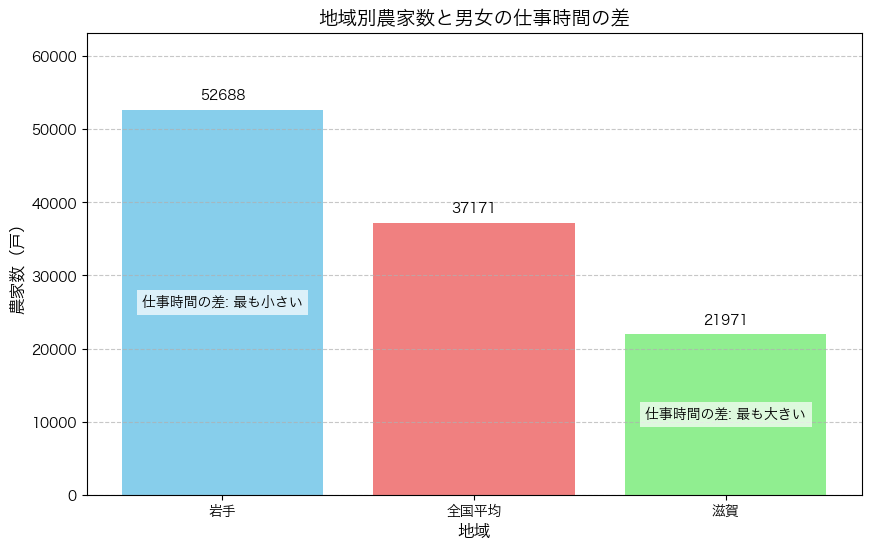

In [27]:
# データ
data = {
    '地域': ['岩手', '全国平均', '滋賀'],
    '農家数': [52688, 37171, 21971],
    '仕事時間の差': ['最も小さい', 'N/A', '最も大きい'] # 定性的な説明
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
bars = plt.bar(df['地域'], df['農家数'], color=['skyblue', 'lightcoral', 'lightgreen'])

# ラベルとタイトルを追加
plt.xlabel('地域', fontsize=12)
plt.ylabel('農家数（戸）', fontsize=12)
plt.title('地域別農家数と男女の仕事時間の差', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# バーの上に数値ラベルを追加
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, round(yval), ha='center', va='bottom', fontsize=10)

# 仕事時間の差に関する注釈を追加
for i, row in df.iterrows():
    if row['仕事時間の差'] != 'N/A':
        plt.text(bars[i].get_x() + bars[i].get_width()/2, bars[i].get_height() / 2,
                 f"仕事時間の差: {row['仕事時間の差']}",
                 ha='center', va='center', color='black', fontsize=10, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Y軸の範囲を調整し、ラベルが見えるようにする
plt.ylim(0, max(df['農家数']) * 1.2)